In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784', version =1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y, z=mnist["data"], mnist["target"], mnist["feature_names"]

In [5]:
x.shape

(70000, 784)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [7]:
some_digit=x[:1].values
some_digit_image=some_digit.reshape(28, 28)

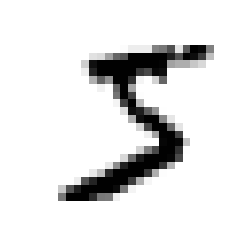

In [8]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [9]:
y=y.astype(np.uint8)

In [10]:
x_train, x_test, y_train, y_test=x[:60000], x[60000:], y[:60000], y[60000:]

In [11]:
y_train_5=(y_train ==5)

In [12]:
y_test_5=(y_test==5)

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict(some_digit)

/Users/mingzhang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [16]:
sgd_clf.predict(x[:1])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [19]:
#5 is only about 10% of the total poplation so accuracy is not a good scoring measure in this case

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_predict=cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [24]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_predict)

0.8370879772350012

In [25]:
recall_score(y_train_5, y_train_predict)

0.6511713705958311

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_train_5, y_train_predict)

0.7325171197343846

In [28]:
some_digit

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [29]:
#CHANGE THE DECISION THRESHOLD

In [30]:
y_scores=cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
                           method='decision_function')

In [31]:
from sklearn.metrics import precision_recall_curve

In [32]:
precisions, recalls, thresholds=precision_recall_curve(y_train_5, y_scores)

In [33]:
precisions

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid()
    plt.legend()
    plt.title('Precision-Recall Curve')

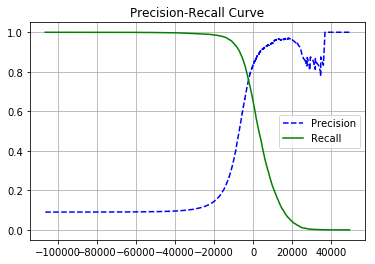

In [35]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [72]:
thresholds[:100]

array([49442.43765905, 49441.43765905, 36801.60697028, 35987.20307515,
       34662.20950045, 34547.44702864, 31847.88726914, 31839.58732479,
       29264.18900855, 28970.36525473, 27687.17859508, 27650.91070036,
       26985.10442945, 26912.27480289, 22602.45142761, 22594.75823782,
       19859.74531376, 19853.71211284, 17954.89819767, 17951.00806729,
       17934.30528312, 17928.40359818, 17690.51956119, 17687.29600225,
       17519.42813377, 17513.98642313, 16641.60312369, 16623.14099462,
       16605.07764448, 16602.97880798, 16298.93626743, 16295.81217811,
       15955.82356144, 15951.57246351, 15845.72560237, 15842.67337766,
       15768.4985877 , 15766.51995729, 15377.33842912, 15366.1707109 ,
       15340.81676598, 15334.205431  , 14716.25835641, 14694.4590773 ,
       14451.47868367, 14445.06006005, 14230.64977315, 14227.92969998,
       13898.74436718, 13893.10803716, 13342.72441755, 13333.93029262,
       13173.21210552, 13172.89992417, 12797.41998227, 12796.2026571 ,
      

In [36]:
#LETS SUPPOSE THAT WE WANT TO AIM AT 90% PRECISION

In [37]:
#search for the lowest threshold that gives you at least 95% precision
threshold_95_precision=thresholds[np.argmax(precisions>=0.95)]
threshold_95_precision

10480.508645329963

In [38]:
y_train_pred_95=(y_scores>=threshold_95_precision)

In [39]:
precision_score(y_train_5, y_train_pred_95)

0.9503367003367004

In [40]:
recall_score(y_train_5, y_train_pred_95)

0.20826415790444566

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Precision vs Recall Curve')

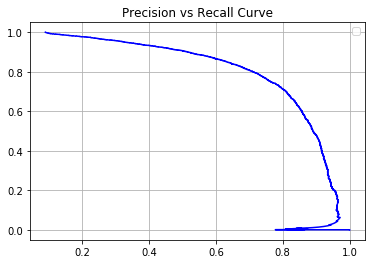

In [41]:
#CHECK THE IN ANOTHER PRECISION VS RECALL PLOT
plt.plot(precisions[:-1], recalls[:-1], "b")
plt.grid()
plt.legend()
plt.title('Precision vs Recall Curve')

In [42]:
import pandas as pd

In [43]:
df=pd.DataFrame({'Precision': precisions[:-1], 'Recall': recalls[:-1]})

In [44]:
import plotly.express as px
from sklearn.metrics import average_precision_score

In [45]:
fig=px.area(
    x=recalls,
    y=precisions,
    labels=dict(x='Recall', y='Precision'),
    width=700,
    height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)

fig.add_shape(
    type='line',
    x0=0, x1=1, y0=0.95, y1=0.95,
    line=dict(
        color="MediumPurple",
        width=2,
        dash="dot",
    ))
fig.show()

In [46]:
#ROC CURVE
from sklearn.metrics import roc_curve

fpr, tpr, thresholds=roc_curve(y_train_5, y_scores)

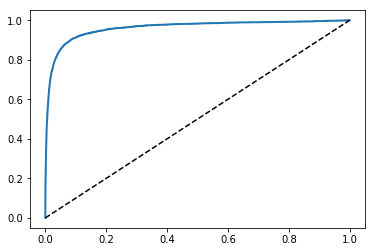

In [47]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
forest_clf=RandomForestClassifier(random_state=42)

In [75]:
y_probas_forest=cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method='predict_proba')

In [78]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [76]:
y_scores_forest=y_probas_forest[:, 1]

In [79]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [55]:
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5, y_scores_forest)

In [56]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    
    # dashed diagonal [...] # Add axis labels and grid
    plot_roc_curve(fpr, tpr)
    plt.show()

RecursionError: maximum recursion depth exceeded in comparison

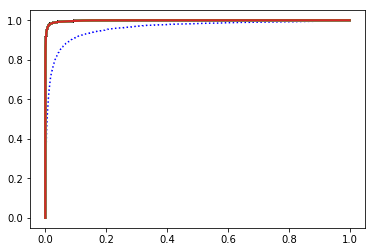

In [57]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--') 
plt.show()

In [58]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [59]:
y_forest_decision=cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method='predict')

In [60]:
precision_score(y_train_5, y_forest_decision)

0.9905083315756169

In [61]:
recall_score(y_train_5, y_forest_decision)

0.8662608374838591

In [ ]:
#MULTIPLE CLASSIFICATION
#OvA 

In [82]:
sgd_clf.fit(x_train, y_train)


SGDClassifier(random_state=42)

In [90]:
some_digit_df=pd.DataFrame(some_digit, columns=list(x_train))

In [92]:
sgd_clf.predict(some_digit_df)

array([3], dtype=uint8)

In [99]:
sgd_clf.decision_function(some_digit_df)

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [93]:
y_forest_MultiClass_decision=cross_val_predict(forest_clf, x_train, y_train, cv=3, method='predict')

In [98]:
sum(y_forest_MultiClass_decision==y_train)/len(y_train)

0.9645833333333333

In [101]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
#STANDARDISE IT

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler=StandardScaler()

In [104]:
x_train_scaled=scaler.fit_transform(x_train)

In [105]:
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])